In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import notebook

Вспомогательные константы, массивы для x, y, t и разностной сетки

In [2]:
Nx, Ny = 100, 100
M, T = 100, 1

x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
t = np.linspace(0, T, M)

h_x = x[1] - x[0]
h_y = y[1] - y[0]
tau = t[1] - t[0]

gamma_x = tau / (h_x**2)
gamma_y = tau / (h_y**2)

u = np.zeros((Nx, Ny, 2 * M + 1))

Вспомогательные функции

In [3]:
def F_1(i1, i2, j):
    return 0.5 * gamma_y * (u[i1, i2-1, j-1] + u[i1, i2+1, j-1]) + \
        (1 - gamma_y) * u[i1, i2, j-1] + \
        0.5 * tau * (tau * (j + 1) /2)**2 * x[i1] * y[i2]

def F_2(i1, i2,j):
    return 0.5 * gamma_x * (u[i1-1, i2, j-1] + u[i1+1, i2, j-1]) + \
        (1 - gamma_x) * u[i1, i2, j-1] +\
        0.5 * tau * (tau * (j - 1) /2)**2 * x[i1] * y[i2]

Вспомогательные функции для метода прогонки

In [4]:
def progonka_x(i2, j):
    d, sigma = np.zeros(Nx), np.zeros(Nx)
    d[1], sigma[1] = 0, 0
    
    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x

    for m in range(1, Nx - 1):
        Fm = - F_1(m, i2, j)
        d[m + 1] = C / (B - A * d[m])
        sigma[m + 1] = (Fm - A * sigma[m]) / (A * d[m] - B)
        u[Nx-1, i2, j] = sigma[-1] / (1 - d[-1])

    for m in range(Nx - 1, 0, -1):
        u[m-1, i2,j] = d[m] * u[m,i2, j] + sigma[m]

def progonka_y(i1,j):
    d, sigma = np.zeros(Ny), np.zeros(Ny)
    
    d[1], sigma[1] = 1, 0

    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y

    for m in range(1, Ny - 1):
       Fm = - F_2(i1, m, j)
       d[m + 1] = C / (B - A * d[m])
       sigma[m + 1] = (Fm - A * sigma[m]) / (A * d[m] - B)
       u[i1, Ny-1, j] = 0

    for m in range(Ny - 1, 0, -1):
        u[i1, m-1, j] = d[m] * u[i1, m, j] + sigma[m]


Начальные условия + метод прогонки

In [5]:
u[:, :, 0] = np.cos(np.pi * x) * x * (1 - x)

for j in range(1, 2 * M, 2):
    for i2 in range(1, Ny - 1):
       progonka_x(i2, j)

    for i1 in range(1, Nx - 1):
       progonka_y(i1, j + 1)

Строим графики при различных значениях t

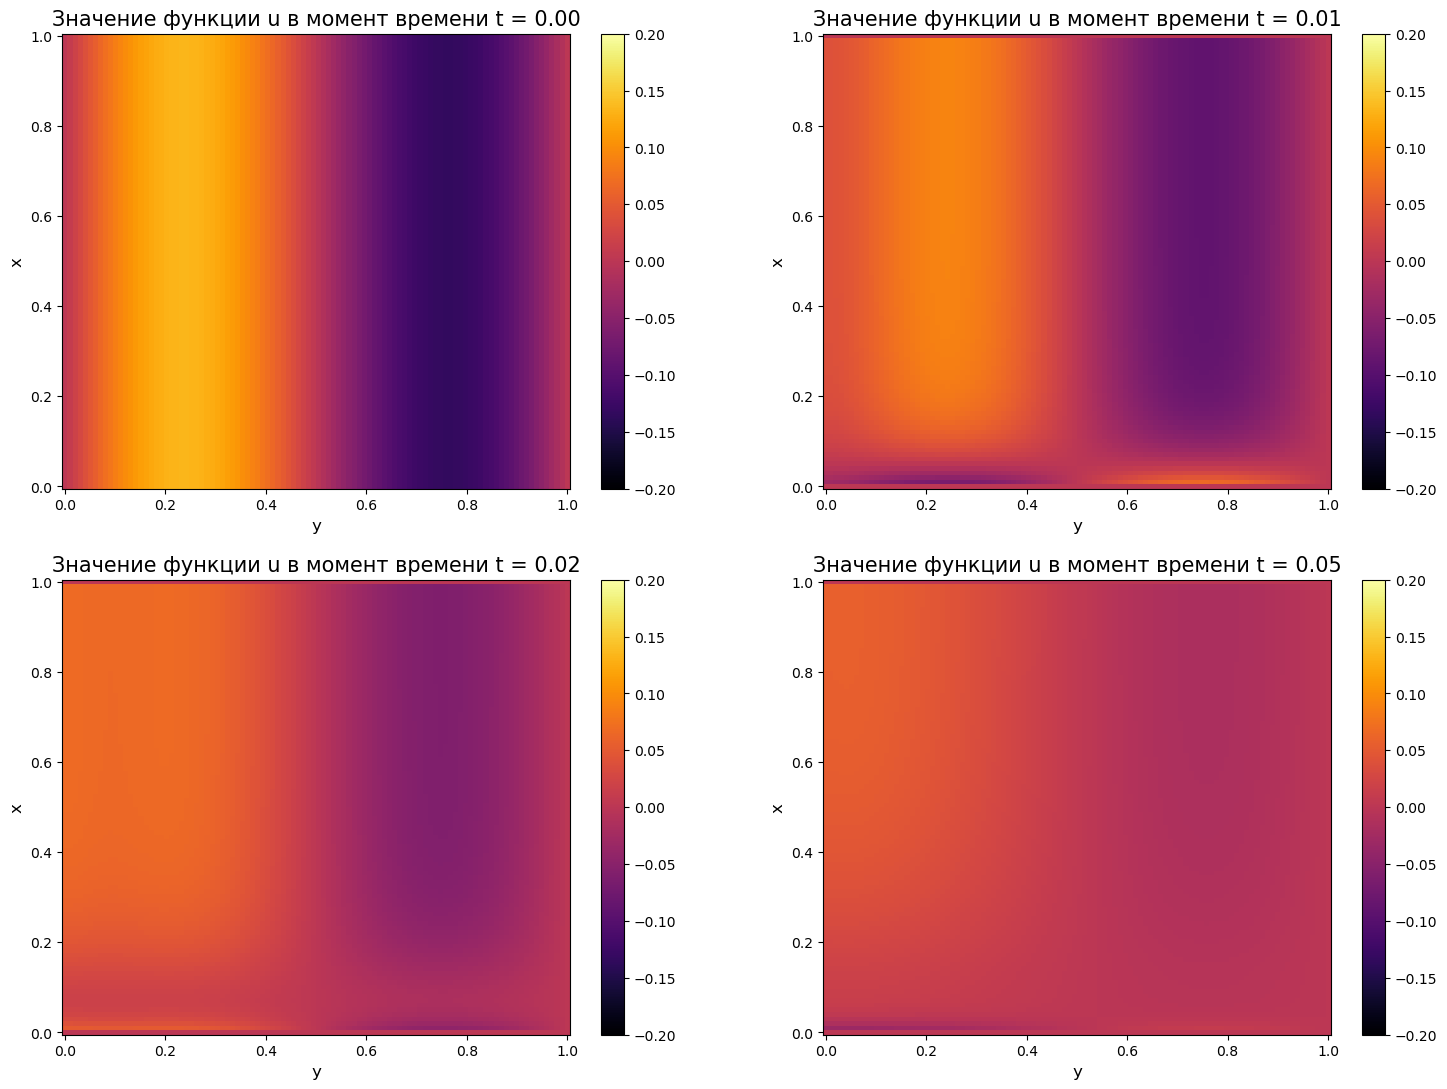

In [6]:
times = [0.0, 0.01, 0.02, 0.05]
fig = plt.figure(figsize = (18, 13))

for i in range(len(times)):
    plt.subplot(2, 2, i + 1)
    r = int(times[i] / T * (2 * M))

    plt.pcolormesh(y, x, u[:, :, r], vmin = -0.2, vmax = 0.2, cmap="inferno")
    plt.colorbar()

    plt.ylabel("х", fontsize = 12)
    plt.xlabel("y", fontsize = 12)
    plt.title(f"Значение функции u в момент времени t = {times[i]:.2f}", fontsize = 15)